In [1]:
#從 sklearn dataset下載 boston的資料集

from sklearn.datasets import load_boston
import pandas as pd #建表格套件

boston= load_boston() 

df = pd.DataFrame(boston["data"], columns = boston["feature_names"])  # data = 各種影響房價的係數, 行標籤 = feature_names
df["target"] = boston["target"] #增加 targer欄位

df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
#(有讀取過的資料-train)做出公式 , 再用(沒讀取過的資料-test)驗證此公式的好話

from sklearn.model_selection import train_test_split
#train _test_split 常用的交叉驗證函式，功能是從樣本中隨機的按比例選取train_data和test_data。 tuple(特徵 90%,特徵10%,目標90%,目標10%)


x_train, x_test, y_train, y_test = train_test_split(boston["data"],boston["target"], test_size = 0.1)


#test_size = 0.1 (有10%拿來做測試)


In [3]:
#做公式(fit)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 5) #決策樹長五層
#fit訓練指令
reg.fit(x_train, y_train) 


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

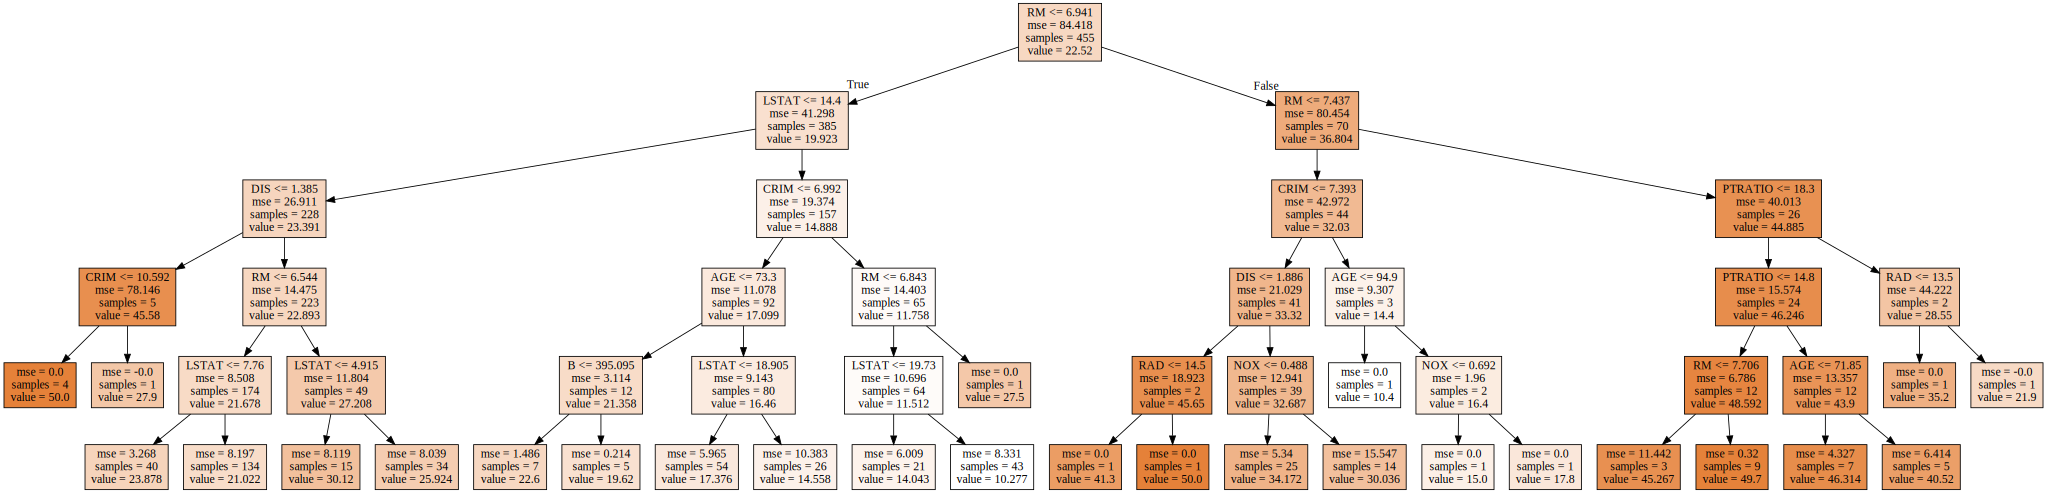

In [4]:
import graphviz #畫關係圖套件
from sklearn.tree import export_graphviz

#產生一個方格敘述
g = export_graphviz(reg, out_file = None,
                    feature_names = boston["feature_names"],filled = True )

graphviz.Source(g)#將方格敘述轉換成圖

In [5]:
#驗證公式好不好 
#預測結果.prdict(x_test) 
print("預測結果:",list(reg.predict(x_test)))
print("正確結果:", list(y_test))


預測結果: [14.557692307692308, 14.557692307692308, 17.37592592592593, 10.276744186046512, 21.021641791044782, 30.120000000000008, 23.8775, 17.37592592592593, 17.37592592592593, 21.021641791044782, 14.557692307692308, 14.557692307692308, 10.276744186046512, 23.8775, 25.923529411764704, 17.37592592592593, 45.26666666666667, 34.172000000000004, 21.021641791044782, 21.021641791044782, 21.021641791044782, 22.6, 21.021641791044782, 21.021641791044782, 40.52, 25.923529411764704, 21.021641791044782, 34.172000000000004, 14.042857142857148, 23.8775, 10.276744186046512, 14.042857142857148, 23.8775, 23.8775, 10.276744186046512, 21.021641791044782, 21.021641791044782, 14.042857142857148, 49.7, 14.042857142857148, 21.021641791044782, 25.923529411764704, 21.021641791044782, 21.021641791044782, 21.021641791044782, 23.8775, 35.2, 21.021641791044782, 25.923529411764704, 25.923529411764704, 10.276744186046512]
正確結果: [13.6, 15.6, 19.5, 17.2, 22.7, 31.2, 24.6, 15.2, 17.0, 19.7, 27.1, 16.5, 8.4, 24.2, 28.0, 14.

In [6]:
# r2_score : 做regression的預測評估函式 0(不準)  0.7、0.8(準)
from sklearn.metrics import r2_score

print ("r2 score:",r2_score(y_test, reg.predict(x_test)))

r2 score: 0.8419118461443377
